dataset from : [link text](https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data)

In [20]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [21]:
# Read the data from CSV file
data = pd.read_csv('Country-data.csv')
# Get the column names
column_names = data.columns
print(column_names)

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')


In [22]:
data.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [23]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Encode the 'country' column using label encoding
encoded = le.fit_transform(data['country'])

# Replace the 'country' column with the encoded values
data['country'] = encoded

In [24]:
data.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
# Select the columns you want to use for clustering
# Assuming your data has two columns 'x' and 'y'
selected_data = data[column_names]

# Convert the selected data to a NumPy array
X = selected_data.to_numpy()

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

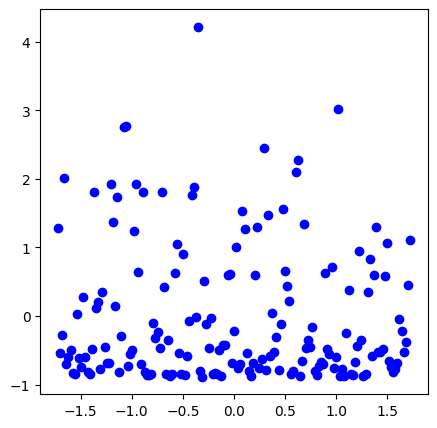

In [28]:
plt.figure(figsize=(5, 5))
plt.plot(X[:, 0], X[:, 1], 'bo');

**Method_1 to get K**

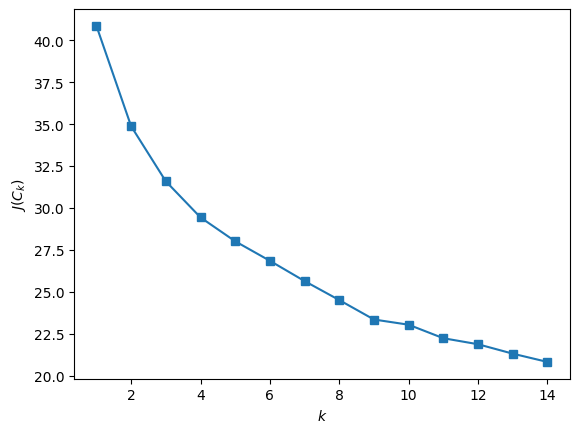

In [29]:
from sklearn.cluster import KMeans
inertia = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))
plt.plot(range(1, 15), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

We see that **J(Ck)** decreases significantly until the number of clusters is **2** and then does not change as much anymore. This means that the optimal number of clusters is **2**.


**Method_2 to get K (CAH)**

In [30]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

In [31]:
# pdist will calculate the upper triangle of the pairwise distance matrix
distance_mat = pdist(X) 
# linkage — is an implementation if agglomerative algorithm
Z = hierarchy.linkage(distance_mat, 'single')

Estimated number of clusters (k): 2


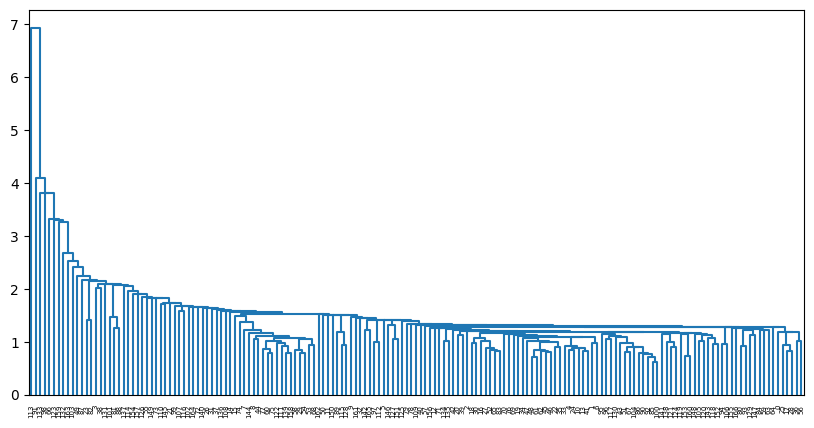

In [32]:
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

# Assuming you have already plotted the dendrogram
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

# Determine the number of clusters from the dendrogram
tallest_line = max(dn['dcoord'], key=lambda x: x[1])
horizontal_line = tallest_line[1]
intersections = [coord for coord in dn['dcoord'] if coord[1] == horizontal_line]
num_clusters = len(intersections) + 1

# Print the estimated number of clusters (k)
print("Estimated number of clusters (k):", num_clusters)


**Choosing the number of clusters for K-means**
we optimize the sum of squared distances between the observations and their centroids.

In [33]:
from scipy.spatial.distance import cdist
# Randomly allocate the 2 centroids 
np.random.seed(seed=42)
centroids = np.random.normal(loc=0.0, scale=1., size=(2, X.shape[1]))

In [34]:
cent_history = []
cent_history.append(centroids)

In [35]:
for i in range(2):
    # Calculating the distance from a point to a centroid
    distances = cdist(X, centroids)
    
    # Checking which centroid is closest to each point
    labels = distances.argmin(axis=1)
    
    # Labeling the points according to the distances
    centroids = centroids.copy()
    for j in range(2):
        centroids[j, :] = np.mean(X[labels == j, :], axis=0)
    
    cent_history.append(centroids)


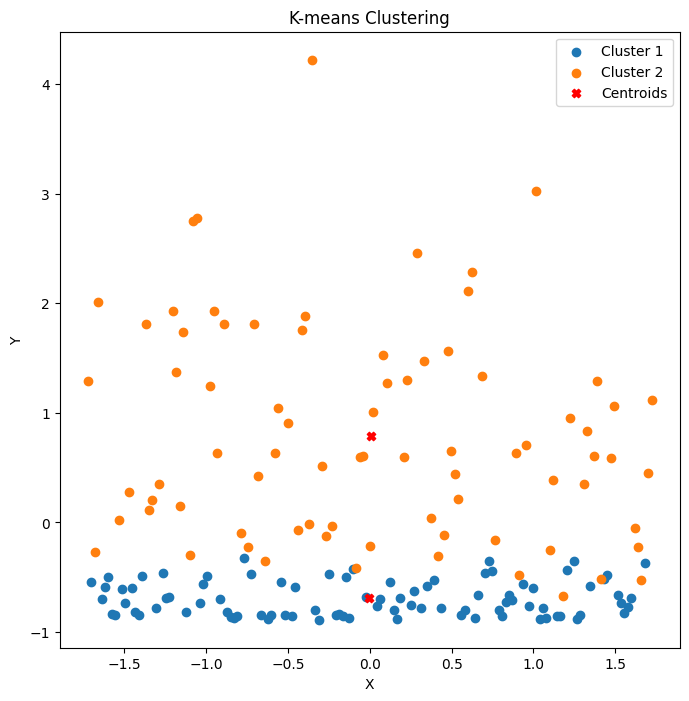

In [36]:
import matplotlib.pyplot as plt

# Initialize empty lists to store cluster points
cluster_points = [[] for _ in range(2)]

for i in range(2):
    # Calculating the distance from a point to a centroid
    distances = cdist(X, centroids)
    
    # Checking which centroid is closest to each point
    labels = distances.argmin(axis=1)
    
    # Labeling the points according to the distances
    centroids = centroids.copy()
    for j in range(2):
        centroids[j, :] = np.mean(X[labels == j, :], axis=0)
        cluster_points[j] = X[labels == j]  # Store points belonging to each cluster
    
    cent_history.append(centroids)

# Plotting the K-means clusters
plt.figure(figsize=(8, 8))
for i in range(2):
    plt.scatter(cluster_points[i][:, 0], cluster_points[i][:, 1], label=f'Cluster {i+1}')

plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='X', label='Centroids')
plt.legend()
plt.title('K-means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


**Method_2 to get K (GMM) GaussianMixture**

In [37]:
from sklearn.mixture import GaussianMixture

# Specify the number of components (clusters) you want to fit
n_components = 2

# Create an instance of GaussianMixture model
gmm = GaussianMixture(n_components=n_components)

# Fit the model to your data
gmm.fit(X)

# Get the predicted cluster labels for each data point
labels = gmm.predict(X)

# Get the estimated parameters of the Gaussian mixture model
means = gmm.means_
covariances = gmm.covariances_
weights = gmm.weights_


In [38]:
print(labels)

[0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0
 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1
 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0
 1 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0]


In [40]:
print("Number of clusters:", len(np.unique(labels)))

Number of clusters: 2
